# 7 Principle Component Analysis and K-Means Clustering
# 7.2 PCA

## Part 1: Load Example Dataset

In [52]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# import csv data
PATH="./data/"
DATA="ex7data1.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']

Visualizing example dataset for PCA.




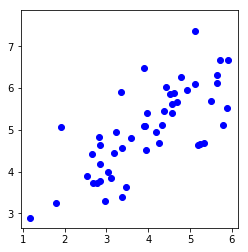

In [91]:
def pltData():
    plt. plot(X[:, 0], X[:, 1], 'bo')
    plt.axis([0.5, 6.5, 2, 8])
    plt.axis('square');

print('Visualizing example dataset for PCA.\n\n')
pltData()

## Part 2: Principal Component Analysis

In [48]:
def featureNormalize(X):
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

    mu = np.mean(X, axis=0)
    X_norm = X-mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma

In [72]:
def pca(X):
#PCA Run principal component analysis on the dataset X
#   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
#   Returns the eigenvectors U, the eigenvalues (on diagonal) in S

    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    sigma = X.T @ X / m #  Covariance of X: n x m x m x n = n x n

    U, S, Vh = np.linalg.svd (sigma) # find the eigenvectors (Principal Components) U and S diagnal matrix which helps with the projection error or invcerse which is the variance retained
    return U, S

In [97]:
def drawLine(p1, p2, typ='-k', width=2):
    #DRAWLINE Draws a line from point p1 to point p2
    #   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
    #   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], typ, linewidth=width)

In [98]:
print('Running PCA on example dataset.\n\n')

Running PCA on example dataset.




Top eigenvector: 

 U(:,1) =  -0.7071067811865475 -0.7071067811865477

(you should expect to see -0.707107 -0.707107)



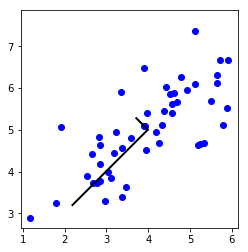

In [99]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
pltData()
drawLine(mu, mu + 1.5 * S[0] * U[:,0].T);
drawLine(mu, mu + 1.5 * S[1] * U[:,1].T);

print('Top eigenvector: \n');
print(' U(:,1) = ', U[0,0], U[1,0])
print('\n(you should expect to see -0.707107 -0.707107)\n');


## Part 3: Dimension Reduction

In [100]:
def projectData(X, U, K):
#PROJECTDATA Computes the reduced data representation when projecting only
#on to the top k eigenvectors
#   Z = projectData(X, U, K) computes the projection of
#   the normalized inputs X into the reduced dimensional space spanned by
#   the first K columns of U. It returns the projected examples in Z.

    Z = np.zeros((X.shape[0], K))

    U_reduce = U[:, 0:K]

    Z = X @ U_reduce

    return Z


In [109]:
def recoverData(Z, U, K):
#RECOVERDATA Recovers an approximation of the original data when using the
#projected data
#   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the
#   original data that has been reduced to K dimensions. It returns the
#   approximate reconstruction in X_rec.

# You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    U_reduce = U[:, 0:K] # n x k
    X_rec = Z @ U_reduce.T #  m x k X k x n ==> m x n original
    return X_rec


Dimension reduction on example dataset.


Projection of the first example: %f
 [-0.91291229]

(this value should be about 1.481274)


Approximation of the first example: %f %f
 -1.0474188259204964 -1.0474188259204966

(this value should be about  -1.047419 -1.047419)




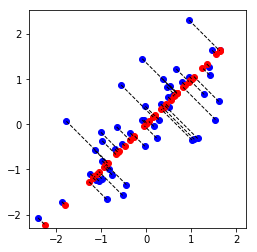

In [112]:
print('\nDimension reduction on example dataset.\n\n');

#  Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.axis('square')

#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: %f\n', Z[1])
print('\n(this value should be about 1.481274)\n\n')

X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: %f %f\n', X_rec[0, 0], X_rec[0, 1])
print('\n(this value should be about  -1.047419 -1.047419)\n\n')

#  Draw lines connecting the projected points to the original points
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro');
for i in range (X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:], '--k', 1)

## Part 4: Loading and Visualizing Face Data 

In [129]:
def displayData(s, sz=32):
    fig, axarr = plt.subplots(nrows=10, ncols=10,figsize=(10,10))    
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(s.shape[0])
            tmp = s[ind,:].reshape(sz,sz, order='F')
            axarr[i,j].imshow(tmp, cmap='gray')
            plt.setp(axarr[i,j].get_xticklabels(), visible=False)
            plt.setp(axarr[i,j].get_yticklabels(), visible=False)
    fig.subplots_adjust(hspace=0, wspace=0)   


Loading face dataset.




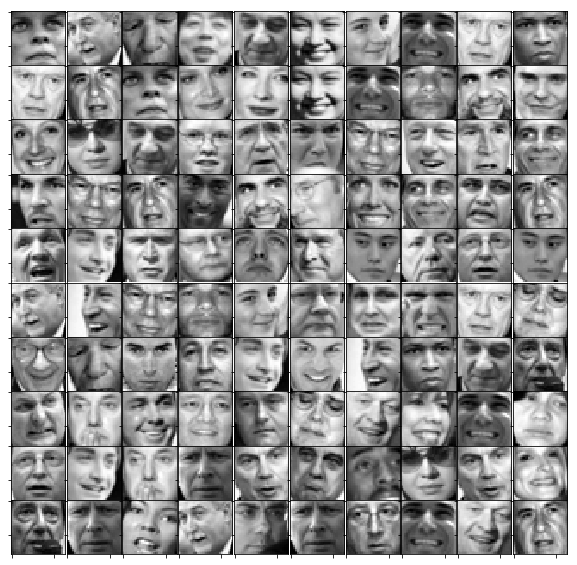

In [130]:
print('\nLoading face dataset.\n\n');

DATA="ex7faces.mat"
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']

#  Display the first 100 faces in the dataset
displayData(X[0:100, :])


## Part 5: PCA on Face Data: Eigenfaces


Running PCA on face dataset.
(this might take a minute or two ...)




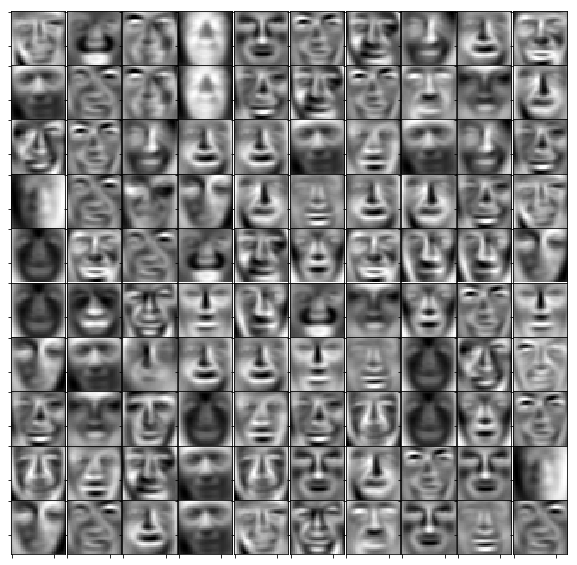

In [132]:
print('\nRunning PCA on face dataset.\n(this might take a minute or two ...)\n\n')

#  Before running PCA, it is important to first normalize X by subtracting
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm);

#  Visualize the top 36 eigenvectors found
displayData(U[:, 0:36].T)

## Part 6: Dimension Reduction for Faces

In [136]:
print('\nDimension reduction for face dataset.\n')

K = 100
Z = projectData(X_norm, U, K)

print(f'The projected data Z has a size of: {Z.shape} vs. {X.shape} for original data')



Dimension reduction for face dataset.

The projected data Z has a size of: (5000, 100) vs. (5000, 1024) for original data


In [134]:
X.shape

(5000, 1024)

## Part 7: Visualization of Faces after PCA Dimension Reduction


Visualizing the projected (reduced dimension) faces.




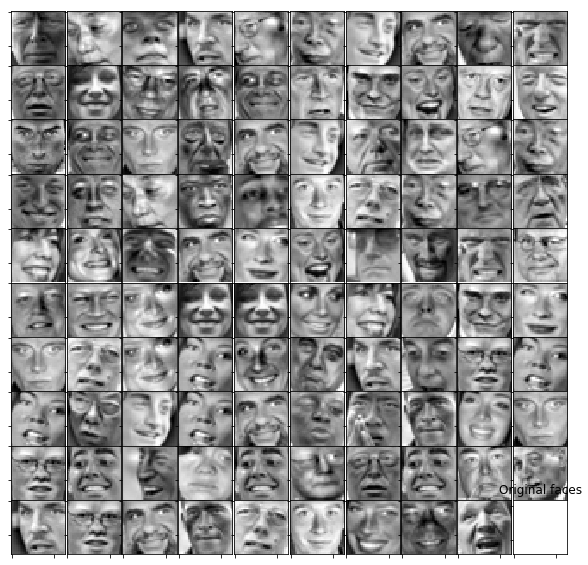

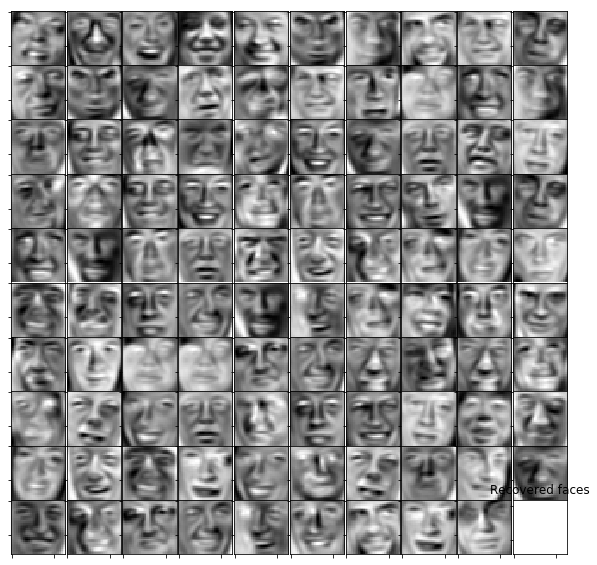

In [144]:
print('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
#plt.subplot(1, 2, 1)
displayData(X_norm[0:102,:])
plt.title('Original faces')
plt.axis('square')

# Display reconstructed data from only k eigenfaces
#plt.subplot(1, 2, 2);
displayData(X_rec[0:102,:])
plt.title('Recovered faces')
plt.axis('square');


## Part 8(a): Optional (ungraded) Exercise: PCA for Visualization